In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("Placement_Data_Full_Class.csv")
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
quan=[]
qual=[]
for i in data.columns:
    if(data[i].dtypes=="object"):
        #print(qual)
        qual.append(i)
    else:
        #print(quan)
        quan.append(i)
    

In [4]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [5]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [23]:
# 1) Here replaced NaN values in the salary column with 0 because they didn't placed."
data=pd.DataFrame(data)
data["salary"].fillna(data["salary"][0],inplace=True)
# Answer = Replaced NaN values into 0 because they have not got placed in work.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9600\3770009963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["salary"].fillna(data["salary"][0],inplace=True)


In [24]:
# 2) How many of them are not placed?
sub_A=data[data["status"]=="Placed"]
sub_B=data[data["status"]=="Not Placed"]
sub_B.shape
# Answer =  67 of them were not placed

(67, 15)

In [25]:
# 3) Which specialization is getting minimum salary?
value=data['salary'].min()
value1 = data[data['salary'] == value]['specialisation'].unique()
print(f"Overall minimum salary:{value}")
print("Specialisations with minimum salary:")
print(value1)
# Answer = The both specialization is gettting minimum salary - 200000

Overall minimum salary:200000.0
Specialisations with minimum salary:
['Mkt&Fin' 'Mkt&HR']


In [26]:
# 4) Find the reason for non placement from the dataset?
num=data[data["status"]=="Not Placed"]
num1=data[data["status"]=="Placed"]
# Answer -  The reason for non placement is may be they didn't perform well in the interview

In [27]:
num

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,270000.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,270000.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,270000.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,270000.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,270000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,270000.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,270000.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,270000.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,270000.0


In [28]:
num1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


Person correlation coefficient: 0.15396569679231584


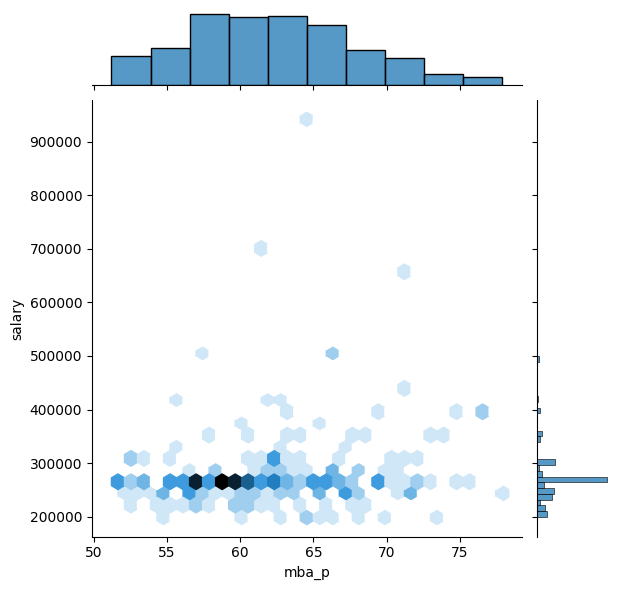

In [29]:
# 5) What kind of relation between salary and mba_p  
correlation = data['mba_p'].corr(data['salary'])
sns.jointplot(x='mba_p',y='salary',kind='hex',data=data)
print(f"Person correlation coefficient: {correlation}")
# positive correlation > 0 
# negative correlation < 0
# Zero correlation = 0
# Answer - The correlation is 0.153965 it's a positive correlation

In [30]:
 # 6) Test the Analysis of variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)
# Analysis of variance testing
import scipy.stats as stats
stats.f_oneway(data['etest_p'],data['mba_p'])
# Answer = p_value (4.672547) is greater than 0.05 so accepting null hypothesis and rejecting atlernate hypothesis

F_onewayResult(statistic=np.float64(98.64487057324706), pvalue=np.float64(4.672547689133573e-21))

In [31]:
# 7) How many of them getting above 500000 salary?
val=(data['salary']>500000).sum()
print(f'The person getting more than 500000:{val}')
#val=data[data['salary']>500000]
#val
# Answer = The person getting more than  500000 is 3 person

The person getting more than 500000:3


In [32]:
# 8) Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary
# at significance level of 5% (Make decision using Hypothesis Testing)
# T_test (Unparied - Independent Sample testing)
# Two group one condition
from scipy.stats import ttest_ind
degre=data[data['degree_t']=='Sci&Tech']['salary']
speci=data[data['specialisation']=='Mkt&HR']['salary']
ttest_ind(degre,speci)
# Answer = p_value is 0.003 is less than 0.05 so accepting alternate hypothesis and rejecting null hypothesis 

TtestResult(statistic=np.float64(3.003370033742519), pvalue=np.float64(0.0031231600237737137), df=np.float64(152.0))

In [33]:
# 9) Converting the normal distribution to standard normal distribution for salary column
import seaborn as sns
def stndis(data):
    mean=data['salary'].mean()
    std=data['salary'].std()
    z=[((i-mean)/std) for i in data['salary']]
    sns.distplot(z,kde=True,kde_kws={'color':'yellow'},color='green')
    sum(z)/len(z)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9600\1316885799.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z,kde=True,kde_kws={'color':'yellow'},color='green')


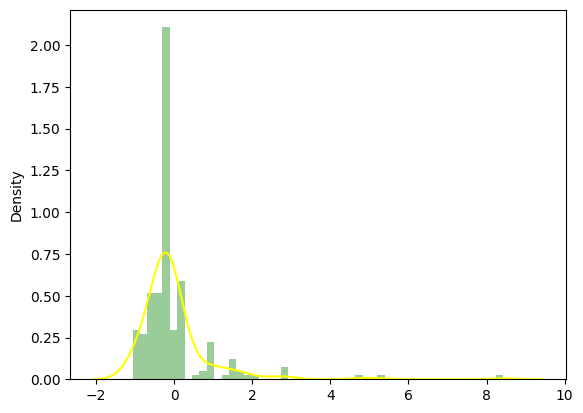

In [34]:
stndis(data)

In [35]:
# 10) What is the probability density function of the salary range form 700000 to 900000?
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm
def proden(data,startrange,endrange):
    sns.distplot(data,kde=True,kde_kws={'color':'blue'},color='green')
    pyplot.axvline(startrange,color='black')
    pyplot.axvline(endrange,color='black')
    mean=data.mean()
    std=data.std()
    print("Mean=%.3f,standard deviation=%.3f"%(mean,std))
    dist=norm(mean,std)
    value=[dist.pdf(i)for i in range(startrange,endrange)]
    num=sum(value)
    print('The area range between({},{}):{}'.format(startrange,endrange,sum(value)))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9600\3542851024.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True,kde_kws={'color':'blue'},color='green')


Mean=282841.860,standard deviation=77940.566
The area range between(700000,900000):4.3432884859707695e-08


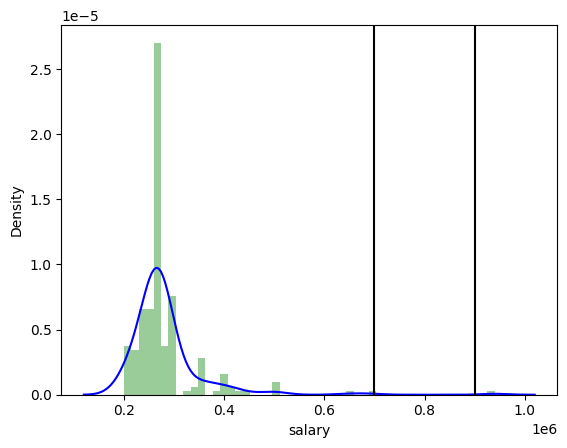

In [36]:
proden(data['salary'],700000,900000)
# Answer = The probability density function is only 4.34328% for getting between salary 700000 to 900000

In [37]:
# 11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%
#(Make decision using Hypothesis Testing)
# Dependent sample - Paired
# One group two condition
from scipy.stats import ttest_rel
degr=data[data['degree_t']=='Sci&Tech']['etest_p']
degree=data[data['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(degr,degree)
# Answer = p_value is 5.517 which is greater than 0.05 so accepting null hypothesis and rejecting alternate hypothesis

TtestResult(statistic=np.float64(5.0049844583693615), pvalue=np.float64(5.517920600505392e-06), df=np.int64(58))

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.048247
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.090972
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.108752
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.039260
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.166065
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.153966
salary,0.048247,0.090972,0.108752,0.039260,0.166065,0.153966,1.000000


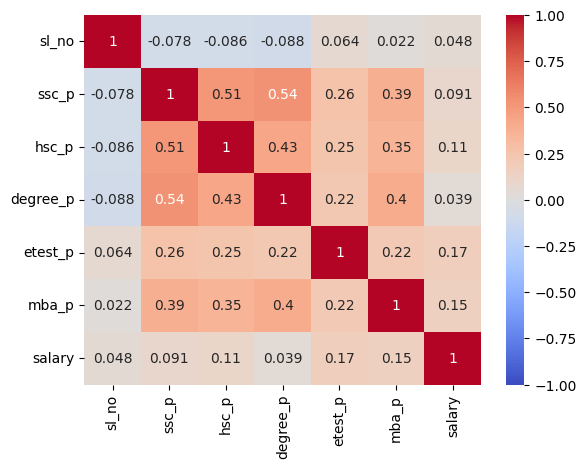

In [38]:
# 12) Which parameter is highly correlated with salary
numb=data[quan].corr()
sns.heatmap(numb, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# seaborn creates a heatmap of the correlation matrix (corr_matrix).
# annot=True (adds numerical annotations to each cell.)
# cmap='coolwarm' (specifies the color map for the heatmap (you can choose other colormaps like 'viridis', 'plasma', etc.))
# vmin and vmax set the range for the color bar based on the correlation values (-1 to 1 in this case).
numb
# Answer = degree_p is highly correlated with salary

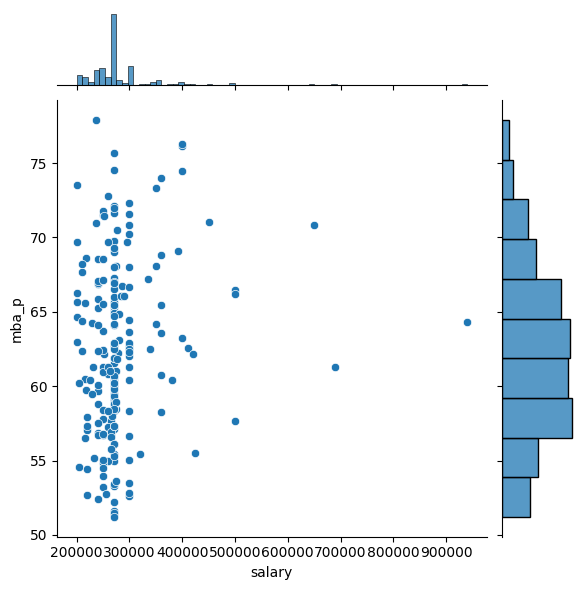

In [39]:
# 13)Plot any useful graph and explain it
sns.jointplot(x='salary',y='mba_p',data=data)
# Answer
# The average salary range for mba_p students who scored between 55 to 70 marks falls between 200,000 to 400,000.
# Even those who score high mark also getting below 500000 salary.
# We can see a histogram in the graph.
# Its is scatter map.